In [1]:
import sys, os
sys.path.append('/cr/users/filip/bin/')

# from utils.Auger.SD import Monitoring

from utils.binaries import *
from utils.plotting import *

def is_winter_night(df):
    mask = []
    for _, row in df.iterrows():
        t = row['t']

        if t.month not in [6, 7]: 
            mask.append(False)
            continue
        if not (0 <= t.hour < 6): 
            mask.append(False)
            continue

        mask.append(True)

    return mask

def is_summer_day(df):
    mask = []
    for _, row in df.iterrows():
        t = row['t']

        if t.month not in [1, 12]: 
            mask.append(False)
            continue
        if not (12 <= t.hour < 18): 
            mask.append(False)
            continue

        mask.append(True)

    return mask

17:04:37 [INFO] utils          -- ( +4141ms) -- import logging
17:04:38 [INFO] utils.binaries -- (  +126ms) -- import numpy as np
17:04:38 [INFO] utils.binaries -- (    +8ms) -- import uncertainties
17:04:38 [INFO] utils.binaries -- (  +244ms) -- import pandas as pd
17:04:38 [INFO] utils.binaries -- (    +2ms) -- import binaries.tools as tools
17:04:39 [INFO] utils.plotting -- (  +814ms) -- import matplotlib.pyplot as plt
17:04:39 [INFO] utils.plotting -- (  +374ms) -- import seaborn as so
17:04:39 [DBUG] utils.plotting -- (    +9ms) -- font size set to 9.5
17:04:39 [DBUG] utils.plotting -- (    +1ms) -- label size set to 13.0
17:04:39 [DBUG] utils.plotting -- (    +1ms) -- figure size set to [6.6, 3.3]
17:04:39 [DBUG] utils.plotting -- (    +0ms) -- markersize set to 2.0
17:04:39 [DBUG] utils.plotting -- (    +1ms) -- usetex set to False
17:04:39 [INFO] utils.plotting -- (    +1ms) -- import plotting.tools as plot


In [2]:
import datetime

GPS_OFFSET = 315964800
data = pd.read_csv('/cr/tempdata01/filip/SSDCalib/BootstrapHistos/estimates.txt', sep=' ', index_col=False)
data = data.dropna()

data['id'] = data['id'].astype(str)
data['t'] = [datetime.datetime.fromtimestamp(d + GPS_OFFSET) for d in data['t']]

data.replace([np.inf, -np.inf], np.nan, inplace=True)
data = data.dropna()

stations = np.unique(data['id'])

In [3]:
data

,id,t,mip,1.0xmip,1.05xmip,1.1xmip,1.15xmip,1.2xmip,1.25xmip,1.3xmip,...,4.55xmip,4.6xmip,4.65xmip,4.7xmip,4.75xmip,4.8xmip,4.85xmip,4.9xmip,4.95xmip,5.0xmip
0,692,2023-06-01 02:28:15,46.4181,52.8660,52.2137,51.5470,51.0361,50.6239,50.3013,50.1160,...,46.0499,46.5714,46.3503,46.0560,46.0215,45.6616,45.3751,45.4063,45.4746,45.6223
1,1714,2023-06-01 02:28:20,44.5653,45.8331,45.6356,45.3759,45.2946,45.1354,44.9722,44.8074,...,43.5855,43.7268,43.6325,43.6647,43.6442,43.3684,43.0590,43.0047,42.8548,42.9569
2,612,2023-06-01 02:27:55,40.4048,47.5188,46.8451,46.1906,45.7974,45.4635,45.0945,44.7487,...,40.1205,40.1341,39.9687,39.9313,39.6428,39.4492,39.2595,39.0629,38.9472,39.0832
3,823,2023-06-01 02:36:42,43.7651,47.4672,47.2796,46.9912,46.8745,46.6095,46.5702,46.4698,...,46.1863,46.5237,46.2899,46.0634,45.8587,45.6631,45.5485,45.4315,45.0557,45.1420
4,1800,2023-06-01 02:36:40,46.0537,49.4856,49.1307,48.8563,48.7182,48.4643,48.2895,48.1329,...,45.1904,44.9096,44.8586,44.8597,45.5316,45.4450,45.9628,46.1295,46.1150,46.0027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874095,341,2024-01-01 02:10:12,39.4626,39.2228,39.2754,39.4375,39.5303,39.6527,39.6430,39.8292,...,39.1809,39.5264,39.4373,39.1402,39.0257,38.6757,38.6481,38.4595,38.5711,38.3784
874096,310,2024-01-01 02:10:07,40.3054,42.2120,41.9418,41.7940,41.5829,41.5418,41.3488,41.0947,...,39.5716,39.4580,39.2564,39.4829,39.5113,39.3727,39.4339,39.3137,39.6361,39.3528
874097,332,2024-01-01 02:10:50,38.5116,29.9208,31.1310,31.9565,32.6464,33.0621,33.4576,33.7642,...,34.4163,34.5423,34.6835,34.5569,34.3441,34.3839,34.3056,34.3639,34.2126,34.1302
874098,653,2024-01-01 02:10:45,43.1944,45.2805,44.9922,44.6738,44.5000,44.3923,44.3201,44.3530,...,41.7512,41.6568,41.4577,41.3323,41.3738,41.0280,41.1396,40.8351,40.5986,40.5497


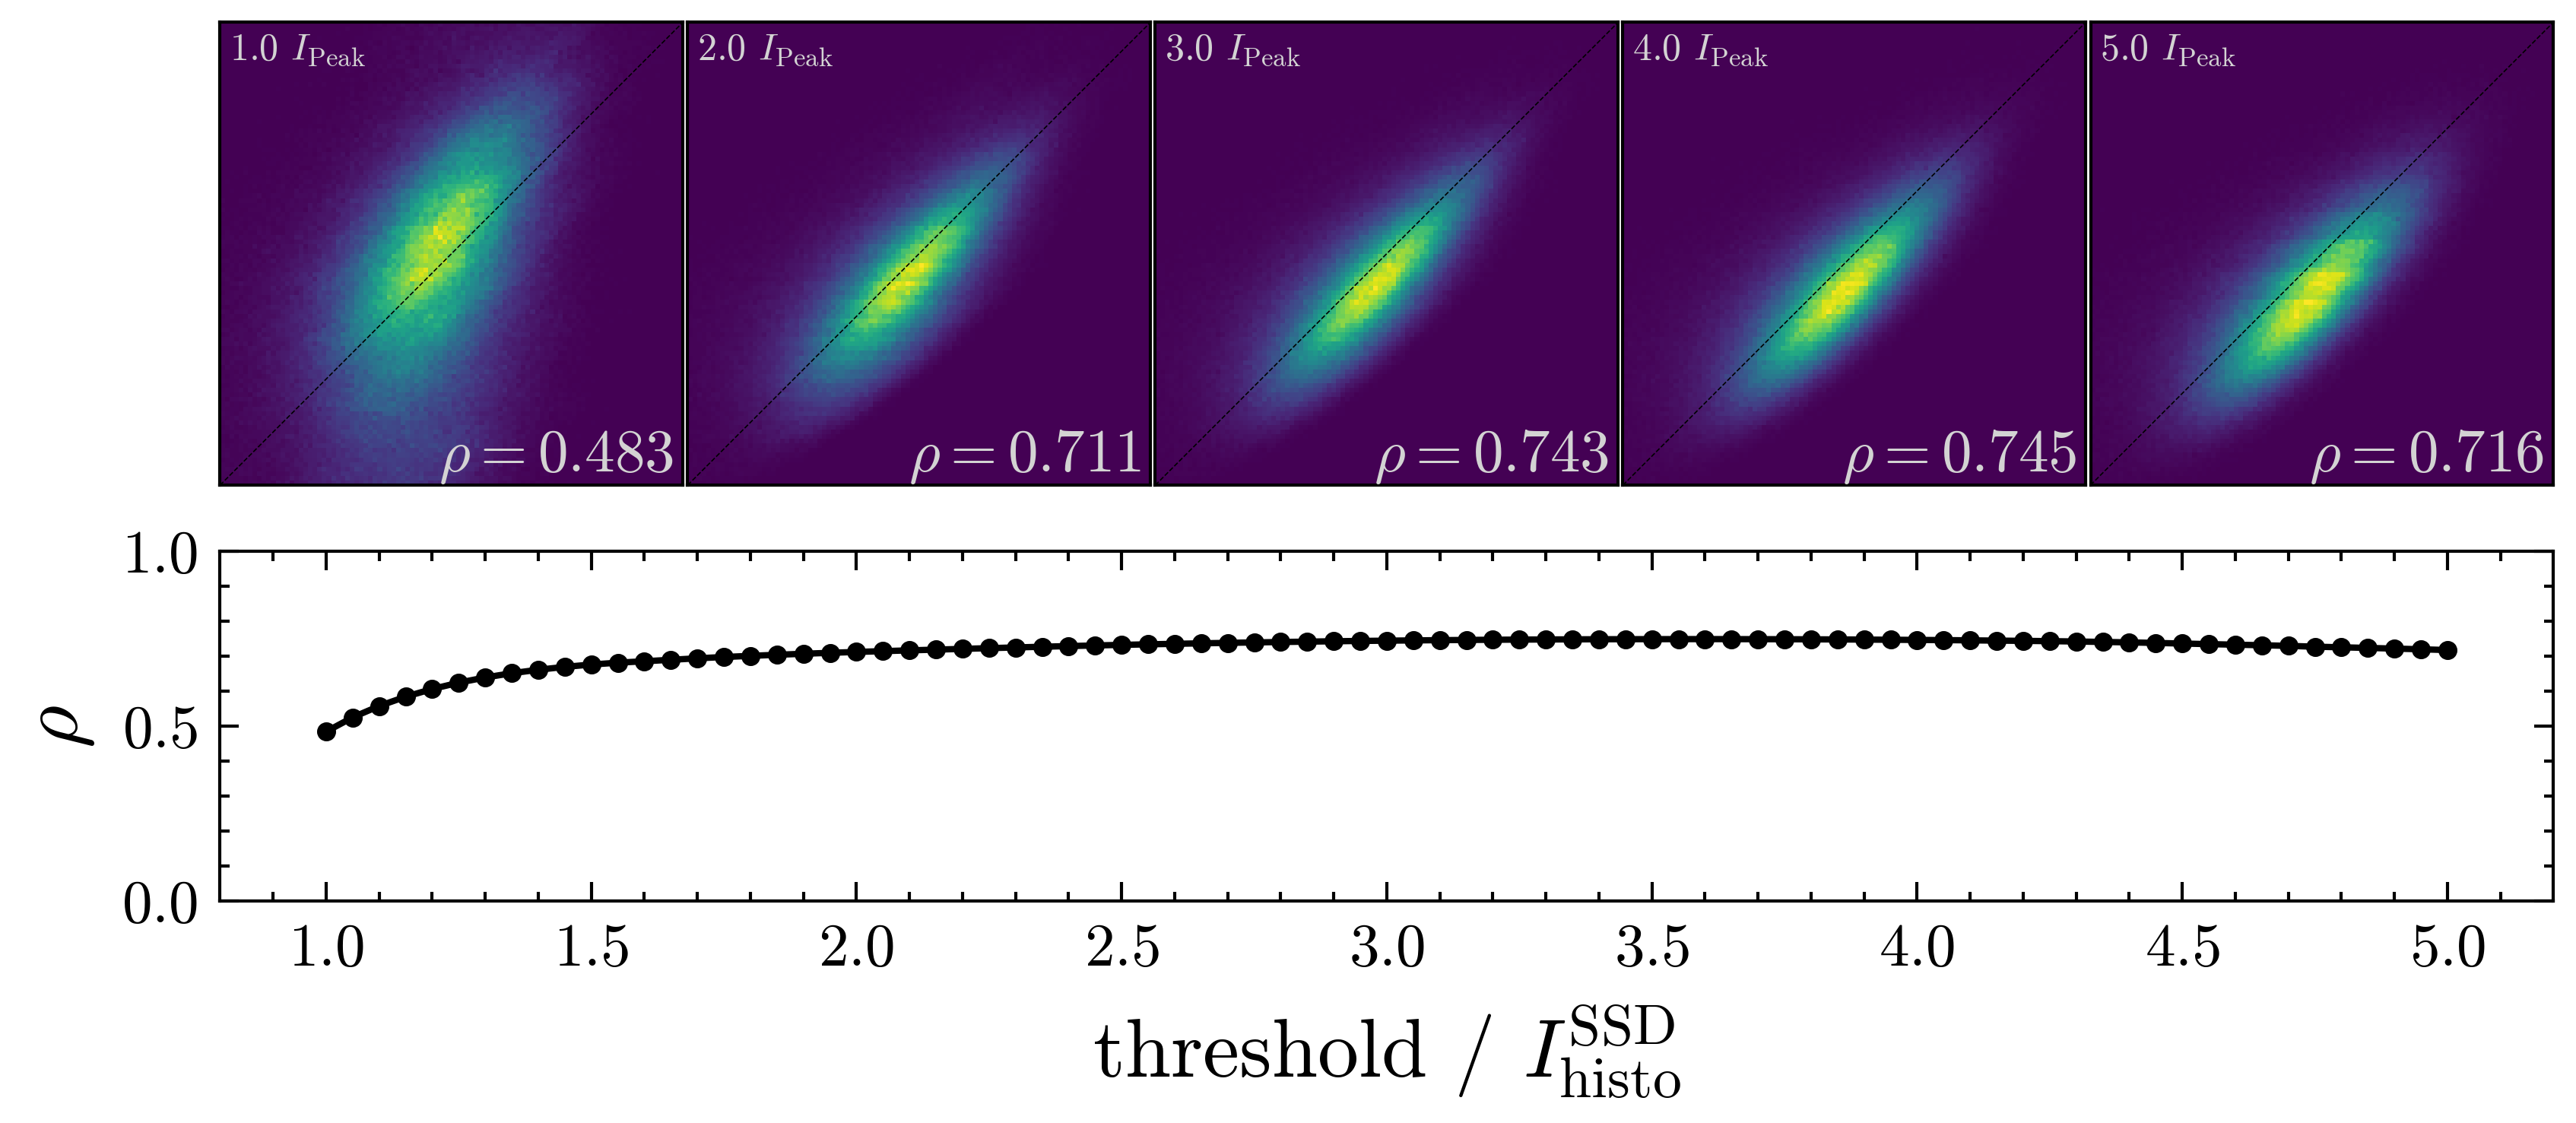

In [4]:
ax1 = plt.subplot2grid((6, 5), (0, 0), rowspan=5)
axes = [plt.subplot2grid((6, 5), (0, i), rowspan=5, sharex=ax1, sharey=ax1) for i in range(1, 5)]
xmin, xmax = data['mip'].min(), data['mip'].max()
axes[0].set_xlim(30, 55)
axes[0].set_ylim(30, 55)

axes.insert(0, ax1)
axes = iter(axes)

# plt.subplots(1, 5, sharex=True, sharey=True)
ax2 = plt.subplot2grid((6, 5), (5, 0), colspan=5)

corr_coeffs, thresholds = [], []

for step, col in enumerate(data.columns[3::]):
    

    corr_coeff = np.corrcoef(data['mip'], data[col])[0, 1]
    thresholds.append(float(col.replace('xmip', '')))
    corr_coeffs.append(corr_coeff)

    if step % 20 != 0: continue

    ax = next(axes)
    _ = ax.hist2d(data['mip'], data[col], bins=100, range=[[30,55], [30,55]])
#     ymin, ymax = data[col].min(), data[col].max()
    ax.set_box_aspect(1)
    ax.text(0.02, 0.98, 
            col.replace('xmip', ' $I_\mathrm{Peak}$'), 
            fontdict={'fontsize' : 6},
            horizontalalignment='left',
            verticalalignment='top',
            transform=ax.transAxes,
            color='lightgray'
            )
    ax.text(0.98, 0, 
            fr"$\rho=${corr_coeff:.3f}",
            horizontalalignment='right',
            verticalalignment='bottom',
            transform=ax.transAxes,
            color='lightgray'
            )
    ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls='--', lw=0.2, c='k')
    ax.set_xticks([]), ax.set_yticks([])

ax2.set_ylabel(r"$\rho$")
ax2.set_xlabel('threshold / $I^\mathrm{SSD}_\mathrm{histo}$')
ax2.errorbar(thresholds, corr_coeffs, fmt='o-')
ax2.set_ylim(0, 1)

plt.subplots_adjust(wspace=0.01, hspace=-0.55)
plt.savefig('correlations.png')

In [5]:
container = []
container_summer = []
container_winter = []

summer = data[is_summer_day(data)]
winter = data[is_winter_night(data)]
least_data_points = 30

for station in stations:
    df = data[data["id"] == station]
    df_summer = summer[summer["id"] == station]
    df_winter = winter[winter["id"] == station]
    mip_and_sigma_and_bias = [station, df['mip'].mean()]
    mip_and_sigma_and_bias_summer = [station, df_summer['mip'].mean()]
    mip_and_sigma_and_bias_winter = [station, df_winter['mip'].mean()]

    for col in data.columns[3:]:
            mip_and_sigma_and_bias.append([df[col].mean(), df[col].std()])
            mip_and_sigma_and_bias_summer.append([df_summer[col].mean(), df_summer[col].std()])
            mip_and_sigma_and_bias_winter.append([df_winter[col].mean(), df_winter[col].std()])

    if len(df) >= least_data_points:
        container.append(mip_and_sigma_and_bias)
    if len(df_summer) >= least_data_points:
        container_summer.append(mip_and_sigma_and_bias_summer)
    if len(df_winter) >= least_data_points:
        container_winter.append(mip_and_sigma_and_bias_winter)

performance = pd.DataFrame(container, columns=['id', 'mip', *data.columns[3:]])
performance_summer = pd.DataFrame(container_summer, columns=performance.columns)
performance_winter = pd.DataFrame(container_winter, columns=performance.columns)

In [ ]:
performance

In [ ]:
from matplotlib.collections import LineCollection

N = np.linspace(1, 5, len(performance.columns[2:]))
dfs = [performance, performance_summer, performance_winter]
cmap = ['plasma', 'autumn', 'winter']
title = ["all events", "summer days", "winter nights"]

for i in range(3):

    if i == 1:
        set_plt_style('double tex')

    fig = plt.figure()
    ax = plt.gca()

    for _, station in dfs[i].iterrows():
        mip = station['mip']

        x = (station[2:].map(lambda _: _[0]).values - mip) / mip
        y = station[2:].map(lambda _: _[1]).values / mip

        points = np.array([x, y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)

        lc = LineCollection(segments, cmap=cmap[i], alpha=0.7)
        lc.set_array(N)
        lc.set_linewidth(0.8)
        l = ax.add_collection(lc)

    ax.set_xlim(-0.5, 0.5)
    ax.set_ylim(0, 0.2)
    ax.axvline(0, c='k', ls='--', lw=1, zorder=-10)
    ax.set_xlabel("$(I^\mathrm{SSD}_\mathrm{rate} - I^\mathrm{SSD}_\mathrm{histo})\,/\,I^\mathrm{SSD}_\mathrm{histo}$")
    ax.set_ylabel("$\sigma_{I^\mathrm{SSD}_\mathrm{Rate}}\,/\,I_\mathrm{Peak}$")
    fig.colorbar(l, ax=ax, label="threshold / $I_\mathrm{Peak}$")
    ax.legend(title=f'{len(dfs[i])} stations')
    ax.set_title(title[i])

set_plt_style('single tex')

In [ ]:
threshold, mean_rates = np.loadtxt('/cr/users/filip/Data/SDMonitHistos/mean_rates.txt', unpack=True)
fig, (ax1, ax2) = plt.subplots(1, 2)

biases, biases_summer, biases_winter = [], [], []
for station in stations:

    events = performance[performance['id'] == station]
    summer = performance_summer[performance_summer['id'] == station]
    winter = performance_winter[performance_winter['id'] == station]

    mip = events['mip'].values[0] if len(events) != 0 else np.nan
    mip_summer = summer['mip'].values[0] if len(summer) != 0 else np.nan
    mip_winter = winter['mip'].values[0] if len(winter) != 0 else np.nan

    if not np.isnan(mip): biases.append((events.iloc[0][2:].map(lambda _ : _[0]).values - mip) / mip)
    if not np.isnan(mip_summer): biases_summer.append((summer.iloc[0][2:].map(lambda _ : _[0]).values - mip_summer) / mip_summer)
    if not np.isnan(mip_winter): biases_winter.append((winter.iloc[0][2:].map(lambda _ : _[0]).values - mip_winter) / mip_winter)

biases, biases_summer, biases_winter = np.array(biases).T, np.array(biases_summer).T, np.array(biases_winter).T
bias, bias_summer, bias_winter = np.mean(biases, axis=1), np.mean(biases_summer, axis=1), np.mean(biases_winter, axis=1)
sigma_sys, sigma_summer, sigma_winter = np.std(biases, axis=1), np.std(biases_summer, axis=1), np.std(biases_winter, axis=1)
sigma_stat = 1/np.sqrt(mean_rates * 61)

# ax1.set_ylime(-0.05, 0.05)
ax1.plot(threshold, bias, label="all events")
ax1.plot(threshold, bias_summer, label="summer days")
ax1.plot(threshold, bias_winter, label="winter nights")
ax1.axhline(0, c='k', ls='--', lw=1)
ax1.legend()

ax2.plot(threshold, np.sqrt(sigma_sys**2 + sigma_stat**2), label='all events')
ax2.plot(threshold, np.sqrt(sigma_summer**2 + sigma_stat**2), label='summer days')
ax2.plot(threshold, np.sqrt(sigma_winter**2 + sigma_stat**2), label='winter nights')
ax2.plot(threshold, sigma_stat, c='gray', lw=0.5, ls='-.', alpha=0.5)
ax2.legend()

ax1.set_xlabel("threshold / $I_\mathrm{Peak}$")
ax2.set_xlabel("threshold / $I_\mathrm{Peak}$")
ax1.set_ylabel("$(I^\mathrm{SSD}_\mathrm{rate} - I^\mathrm{SSD}_\mathrm{histo})\,/\,I^\mathrm{SSD}_\mathrm{histo}$")
ax2.set_ylabel("$\sigma_{(I^\mathrm{SSD}_\mathrm{rate} - I^\mathrm{SSD}_\mathrm{histo})\,/\,I^\mathrm{SSD}_\mathrm{histo}}$")
plt.tight_layout()

In [ ]:
threshold, mean_rates = np.loadtxt('/cr/users/filip/Data/SDMonitHistos/mean_rates.txt', unpack=True)
# fig, (ax1, ax2) = plt.subplots(1, 2)

set_plt_style('double tex')
plt.figure()
ax1 = plt.gca()
plt.figure()
ax2 = plt.gca()


biases, biases_summer, biases_winter = [], [], []
for station in stations:

    events = performance[performance['id'] == station]
    summer = performance_summer[performance_summer['id'] == station]
    winter = performance_winter[performance_winter['id'] == station]

    mip = events['mip'].values[0] if len(events) != 0 else np.nan
    mip_summer = summer['mip'].values[0] if len(summer) != 0 else np.nan
    mip_winter = winter['mip'].values[0] if len(winter) != 0 else np.nan

    if not np.isnan(mip): biases.append((events.iloc[0][2:].map(lambda _ : _[0]).values - mip) / mip)
    if not np.isnan(mip_summer): biases_summer.append((summer.iloc[0][2:].map(lambda _ : _[0]).values - mip_summer) / mip_summer)
    if not np.isnan(mip_winter): biases_winter.append((winter.iloc[0][2:].map(lambda _ : _[0]).values - mip_winter) / mip_winter)

biases, biases_summer, biases_winter = np.array(biases).T, np.array(biases_summer).T, np.array(biases_winter).T
bias, bias_summer, bias_winter = np.mean(biases, axis=1), np.mean(biases_summer, axis=1), np.mean(biases_winter, axis=1)
sigma_sys, sigma_summer, sigma_winter = np.std(biases, axis=1), np.std(biases_summer, axis=1), np.std(biases_winter, axis=1)
sigma_stat = 1/np.sqrt(mean_rates * 61)

# ax1.set_xlim(-0.05, 0.05)
ax1.plot(threshold, bias, label="all events")
ax1.plot(threshold, bias_summer, label="summer days")
ax1.plot(threshold, bias_winter, label="winter nights")
ax1.axhline(0, c='k', ls='--', lw=1)
ax1.legend()

ax2.plot(threshold, np.sqrt(sigma_sys**2 + sigma_stat**2), label='all events')
ax2.plot(threshold, np.sqrt(sigma_summer**2 + sigma_stat**2), label='summer days')
ax2.plot(threshold, np.sqrt(sigma_winter**2 + sigma_stat**2), label='winter nights')
ax2.plot(threshold, sigma_stat, c='gray', lw=0.5, ls='-.', alpha=0.5)
ax2.legend()

# ax1.yaxis.set_major_formatter('{x:.2f}')
ax1.set_ylim(-0.05, .05)
ax1.set_xlabel("threshold / $I_\mathrm{Peak}$")
ax2.set_xlabel("threshold / $I_\mathrm{Peak}$")
ax1.set_ylabel("$(I^\mathrm{SSD}_\mathrm{rate} - I^\mathrm{SSD}_\mathrm{histo})\,/\,I^\mathrm{SSD}_\mathrm{histo}$")
ax2.set_ylabel("$\sigma_{(I^\mathrm{SSD}_\mathrm{rate} - I^\mathrm{SSD}_\mathrm{histo})\,/\,I^\mathrm{SSD}_\mathrm{histo}}$")
# plt.tight_layout()